# Take grayscale image of size 512x512 and perform the following operations –

(a) Perform the brightness enhancement of a specific range of gray levels and observe its result

(b) Differentiate the results of power law transform and inverse logarithmic transform

(c) Find the difference image between original and the image obtained by last three bits (MSB)

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

(512, 512)


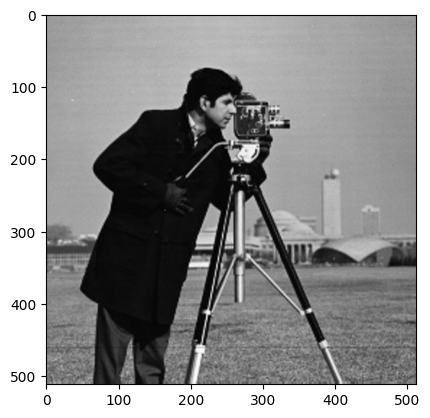

In [3]:
camera_man = cv.imread('camera.png', cv.IMREAD_GRAYSCALE)
plt.imshow(camera_man, cmap='gray')
print(camera_man.shape)

In [4]:
def hist(img):
    tmp = np.zeros(256)

    h, w = img.shape

    for i in range(h):
        for j in range(w):
            tmp[img[i][j]] += 1
    return tmp

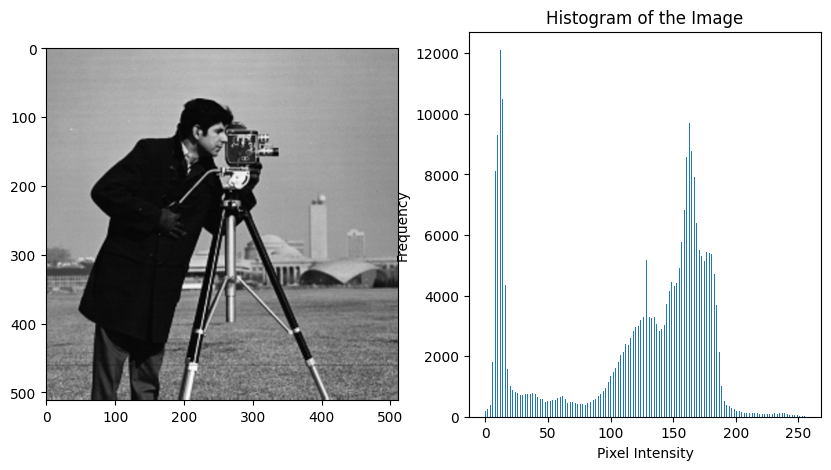

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(camera_man, cmap='gray')
# print(camera_man_gray.shape)

plt.subplot(1, 2, 2)
plt.bar(range(256), hist(camera_man))
plt.title("Histogram of the Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()

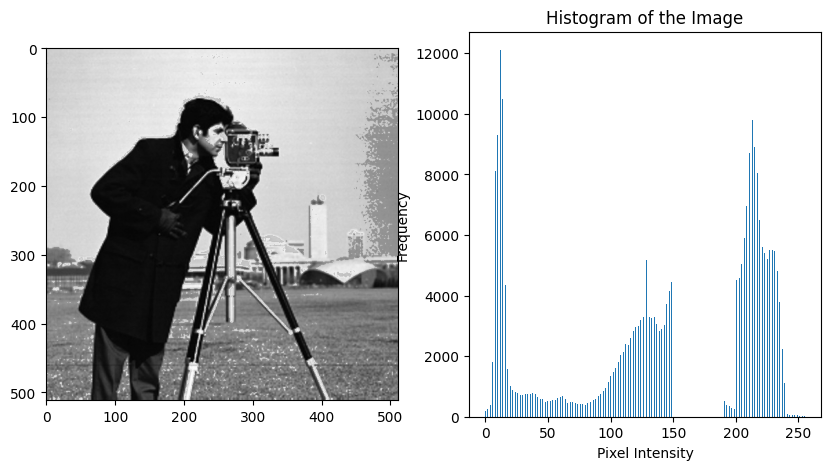

In [9]:
enhanced_image = camera_man.copy()

for i in range(enhanced_image.shape[0]):
    for j in range(enhanced_image.shape[1]):
        if enhanced_image[i][j] >= 150 and enhanced_image[i][j] <= 190:
            enhanced_image[i][j] += 50

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(enhanced_image, cmap='gray')
# print(camera_man_gray.shape)

plt.subplot(1, 2, 2)
plt.bar(range(256), hist(enhanced_image))
plt.title("Histogram of the Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()

In [12]:
def inverse_log_transform(img):
    # Normalize image to range [0, 1] if not already
    img = img.astype(np.float32) / 255.0

    # Apply inverse log: s = exp(r) - 1
    inv_log = np.exp(img) - 1

    # Rescale to [0, 255]
    inv_log = inv_log / inv_log.max() * 255

    return np.clip(inv_log, 0, 255).astype(np.uint8)

/tmp/ipykernel_5876/2043121814.py:6: RuntimeWarning: overflow encountered in scalar add
  c_log = 255 / np.log(1 + camera_man.max())
/tmp/ipykernel_5876/2043121814.py:6: RuntimeWarning: divide by zero encountered in log
  c_log = 255 / np.log(1 + camera_man.max())
/tmp/ipykernel_5876/2043121814.py:7: RuntimeWarning: divide by zero encountered in log
  log_transformed = c_log * np.log(1 + camera_man)
/tmp/ipykernel_5876/2043121814.py:7: RuntimeWarning: invalid value encountered in multiply
  log_transformed = c_log * np.log(1 + camera_man)
/tmp/ipykernel_5876/2043121814.py:8: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.clip(log_transformed, 0, 255).astype(np.uint8)


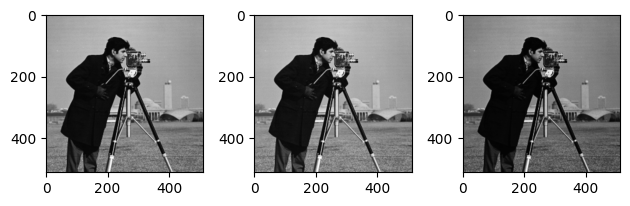

In [14]:
gamma = 0.9
c = 255 / (camera_man.max() ** gamma) 
power_law_transformed = c * (camera_man ** gamma)
power_law_transformed = np.clip(power_law_transformed, 0, 255).astype(np.uint8)

c_log = 255 / np.log(1 + camera_man.max()) 
log_transformed = c_log * np.log(1 + camera_man)
log_transformed = np.clip(log_transformed, 0, 255).astype(np.uint8)

img_inv = inverse_log_transform(camera_man)

plt.subplot(1, 3, 1)
plt.imshow(camera_man, cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(power_law_transformed, cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(img_inv, cmap='gray')


plt.tight_layout()
plt.show()